### Building the SVM
Here we will aim to represent the conversations using Bag-Of-Words (BOW) with a TF-IDF weighing scheme and then build our SVM Suspicious Conversations Identifier (SCI).

First we read in the training data and labels.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import xml.etree.ElementTree as ET #for parsing the xml file
import csv #for working on csv files


def get_labels_dict(data_path): #data path the path for the dataset
    labels_dict = {} #dictionary to store conversation id and label
    with open(data_path + 'sci_labels.csv', 'r') as f:# open the labels file in reading mode
        file = csv.reader(f)#Return a reader object file which will iterate over lines in the given csvfile.
        for row in file: #for each row(line) in file set the labels dictionary
            labels_dict[row[0]] = row[1] #unique conversation id and the label
    return labels_dict # return the dictionary


def get_features_labels(root, labels_dict):#root of tree and the labels dictionary created are the parameters
    corpus = [] # each row is a string formed from all messages in a conversations
    labels = [] # each row is 0 or 1, corresponds to label for same row in corpus

    for conversation in root:
        string = " " 
        for message in conversation:
            text = message.find('text').text #reading all the messages
            if text is not None:
                string = string + "\r\n" + text
                '''creates a string formed by all the messages in a conversation'''
                '''A carriage return (\r) makes the cursor jump to the first column (begin of the line) while the newline
                 (\n) jumps to the next line and eventually to the beginning of that line. So to be sure to be at the first
                  position within the next line one uses both.'''
        corpus.append(string) #appending each conversation to the list
        labels.append(int(labels_dict[conversation.get('id')])) #creating a label list ordered according to the order of conversations in corpus
    return corpus, labels #return list of conversations and labels

In [4]:
#setting the path for train data
train_data_path = '/content/drive/MyDrive/online-grooming-detector-master/data/svm_training_data/'
training_xml = ET.parse(train_data_path + 'training_data.xml') #parsing the xml file to tree
train_root = training_xml.getroot() #obtaining the root of the tree
#setting the path for test data 
test_data_path = '/content/drive/MyDrive/online-grooming-detector-master/data/svm_test_data/'
test_data_src = '/content/drive/MyDrive/online-grooming-detector-master/data/pan12-sexual-predator-identification-test-corpus-2012-05-21/'
test_xml = ET.parse(test_data_src + 'pan12-sexual-predator-identification-test-corpus-2012-05-17.xml') #parsing the xml file to tree
test_root = test_xml.getroot() #obtaining the root of the tree
#calling get features and get labels function
train_corpus, train_labels = get_features_labels(train_root, get_labels_dict(train_data_path)) #gets a list of conversations and labels in order
test_corpus, test_labels = get_features_labels(test_root, get_labels_dict(test_data_path)) #gets a list of conversations and labels in order

We will now represent all conversations using BOW with TF-IDF weighing scheme.
- [] Customize Vectorizer Parameters like normailize
- [] Use hashing vectorization to save space and see if performance affected (https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer # module can be used to extract features 
# in a format supported by machine learning algorithms from datasets consisting of text.
import scipy # an open-source library used for solving mathematical, scientific, engineering,
# and technical problems

import numpy as np # It is a general-purpose array-processing package

vectorizer = TfidfVectorizer() #Convert a collection of raw documents to a matrix of TF-IDF features
X_train = vectorizer.fit_transform(train_corpus)
'''Learn vocabulary and idf, return document-term matrix.  This is equivalent to fit followed by transform, but more efficiently implemented. returns Tf-idf-weighted document-term matrix.'''
X_test = vectorizer.transform(test_corpus)
'''Transform raw documents to document-term matrix. returns Tf-idf-weighted document-term matrix.    Uses the vocabulary and document frequencies (df) learned by fit (or fit_transform).'''

X_train = scipy.sparse.csr_matrix(X_train) #Compressed Sparse Row matrix from Tf-idf weighted document term matrix for training
y_train = np.array(train_labels) #Create an array of label values for training
X_test = scipy.sparse.csr_matrix(X_test) #Compressed Sparse Row matrix from Tf-idf weighted document term matrix for test
y_test = np.array(test_labels) #Create an array of label values for testing

# X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=87)
# print("Train data shape:{}\r\nTest data shape:{}".format(X_train.shape, X_test.shape))

We can now build the SVM and do cross validation to explore the accuracy of each kernel and hyperparameter.

linear, c=0.1, Accuracy: 0.9911920529801325
linear, c=0.2, Accuracy: 0.9934437086092716
linear, c=0.30000000000000004, Accuracy: 0.9943708609271523
linear, c=0.4, Accuracy: 0.9947019867549669
linear, c=0.5, Accuracy: 0.9949668874172186
linear, c=0.6, Accuracy: 0.9950993377483444
linear, c=0.7000000000000001, Accuracy: 0.9952317880794702
linear, c=0.8, Accuracy: 0.9952980132450332
linear, c=0.9, Accuracy: 0.995364238410596
linear, c=1.0, Accuracy: 0.9954304635761589
linear, c=1.1, Accuracy: 0.9954304635761589
linear, c=1.2000000000000002, Accuracy: 0.995364238410596
linear, c=1.3000000000000003, Accuracy: 0.995364238410596
linear, c=1.4000000000000001, Accuracy: 0.9954304635761589
linear, c=1.5000000000000002, Accuracy: 0.9954966887417219
linear, c=1.6, Accuracy: 0.9954966887417219
linear, c=1.7000000000000002, Accuracy: 0.9954966887417219
linear, c=1.8000000000000003, Accuracy: 0.9954966887417219
linear, c=1.9000000000000001, Accuracy: 0.9954966887417219
linear, c=2.0, Accuracy: 0.9954

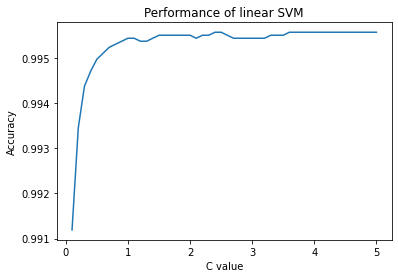

Best performing linear kernel SVM: C=2.4000000000000004, Acc=0.9955629139072848


In [6]:
from sklearn import svm # Importing SVM Libraries
from sklearn.model_selection import KFold # Provides train/test indices to split data in train/test sets. 
# Split dataset into k consecutive folds

import matplotlib.pyplot as plt #  is a collection of functions in the popular visualization package
# Matplotlib. Its functions manipulate elements of a figure, such as creating a figure,
# creating a plotting area,etc

from sklearn import metrics # module implements functions assessing prediction error for specific purposes

import heapq # provides an implementation of the heap queue algorithm, also known as the priority queue
# algorithm

import operator # exports a set of efficient functions corresponding to the intrinsic operators of Python

import numpy as np #  is a Python library used for working with arrays under the np alias

from sklearn.svm import LinearSVC # Similar to SVC with parameter kernel=’linear’, but implemented in 
# terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss
# functions and should scale better to large numbers of samples

num_fold = 5 # it will do the splits for 5 times, and select the hyperparameters with the highest average
# test scores across 5 test sets

k_fold = KFold(num_fold, True, 1) #Kfold("5",shuffle='True'for shuffling,random_state:1 ;affects the ordering of the indices which controls the randomness of each fold)
kernel = 'linear' # Linear Kernel is used when the data is Linearly separable,
# that is, it can be separated using a single Line

acc = [] #accuracy array intialise

for coef_c in np.arange(0.1, 5.1, 0.1):#return evenly spaced values within the given arrangement start 0.1 stop 5.1 step 0.1
    acc_arr = np.zeros(num_fold)#return a new array of specified size and shape containing only zeros
    ind = 0# !!!!!!check if count!!!!!!!!
    for train_rows, val_rows in k_fold.split(X_train):#Generate indices to split data into training and test set.
#         model = svm.SVC(kernel=kernel, C=coef_c, gamma='auto', random_state=0)
        model = LinearSVC(random_state=0, C=coef_c, loss='squared_hinge', dual=True)
        model.fit(X_train[train_rows], y_train[train_rows])
        pred_y = model.predict(X_train[val_rows])
        acc_arr[ind] = metrics.accuracy_score(y_train[val_rows], pred_y)
        ind += 1
    acc.append([coef_c, np.mean(acc_arr)])
    print("{}, c={}, Accuracy: {}".format(kernel, coef_c, acc[len(acc)-1][1]))
plt.plot([i[0] for i in acc], [i[1] for i in acc])
plt.title("Performance of {} SVM".format(kernel))
plt.xlabel("C value")
plt.ylabel("Accuracy")
# plt.savefig('../output/As1_Qn4.2_' + kernel + '_' + datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S") + '.png')
plt.show()
best = heapq.nlargest(1, acc, key=operator.itemgetter(1))[0]
print("Best performing linear kernel SVM: C={}, Acc={}".format(best[0], best[1]))

Now that we have the best linear kernel model, let us test against our test data.

In [7]:
print(best[0])
model = LinearSVC(random_state=0, C=best[0], loss='squared_hinge', dual=True)
model.fit(X_train, y_train)
pred_y = model.predict(X_test)
print(metrics.accuracy_score(y_test, pred_y))

2.4000000000000004
0.9852315507194059


In [ ]:
import pickle
import datetime

# save the model to the models folder
filename = '/content/drive/MyDrive/online-grooming-detector-master/models/SCI_SVM_' + "{:.2f}_".format(metrics.accuracy_score(y_test, pred_y)) + datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S") + '.sav'
pickle.dump(model, open(filename, 'wb'))